<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Checks" data-toc-modified-id="Checks-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Checks</a></span></li></ul></li><li><span><a href="#FD" data-toc-modified-id="FD-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>FD</a></span><ul class="toc-item"><li><span><a href="#w/-dim-redunction" data-toc-modified-id="w/-dim-redunction-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>w/ dim-redunction</a></span><ul class="toc-item"><li><span><a href="#Saving" data-toc-modified-id="Saving-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Saving</a></span></li><li><span><a href="#Formatting" data-toc-modified-id="Formatting-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Formatting</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Mixed-effects-models" data-toc-modified-id="Mixed-effects-models-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Mixed effects models</a></span><ul class="toc-item"><li><span><a href="#Full-dataset" data-toc-modified-id="Full-dataset-5.1.4.1"><span class="toc-item-num">5.1.4.1&nbsp;&nbsp;</span>Full dataset</a></span></li><li><span><a href="#Westernized-+-gender" data-toc-modified-id="Westernized-+-gender-5.1.4.2"><span class="toc-item-num">5.1.4.2&nbsp;&nbsp;</span>Westernized + gender</a></span></li><li><span><a href="#westernized-+-gender-+-age" data-toc-modified-id="westernized-+-gender-+-age-5.1.4.3"><span class="toc-item-num">5.1.4.3&nbsp;&nbsp;</span>westernized + gender + age</a></span></li><li><span><a href="#westernized-+-gender-+-age-+-bmi" data-toc-modified-id="westernized-+-gender-+-age-+-bmi-5.1.4.4"><span class="toc-item-num">5.1.4.4&nbsp;&nbsp;</span>westernized + gender + age + bmi</a></span></li><li><span><a href="#westernized-+-gender-+-age-+-disease" data-toc-modified-id="westernized-+-gender-+-age-+-disease-5.1.4.5"><span class="toc-item-num">5.1.4.5&nbsp;&nbsp;</span>westernized + gender + age + disease</a></span></li><li><span><a href="#Summary:-w/-BMI" data-toc-modified-id="Summary:-w/-BMI-5.1.4.6"><span class="toc-item-num">5.1.4.6&nbsp;&nbsp;</span>Summary: w/ BMI</a></span></li><li><span><a href="#Summary:-w/-Disease" data-toc-modified-id="Summary:-w/-Disease-5.1.4.7"><span class="toc-item-num">5.1.4.7&nbsp;&nbsp;</span>Summary: w/ Disease</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Calculate functional diversity across all samples
* Measures of function:
  * COG content phenotype

# Var

In [1]:
# working dir
work_dir = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/'

# bracken counts
brk_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/bracken_filt2.qs'

# GTDBr89 genome metadata
genome_meta_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/metadata_1per-GTDB-Spec_gte50comp-lt5cont_wtaxID_wPath.tsv'

# sample metadata
## filtered
#metadata_filt_file = file.path(work_dir, 'CurMetDat_metadata_filt-n1846.tsv')
## all 
base_in_dir = '/ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval/'
metadata_file = file.path(base_in_dir, 'CurMetDat-metagenomes', 'files', 'metadata', 'Filtered_CurMetDat_ff.tsv')

# genes per COG-category
cog_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/genes-per-COGcat_UniRef90.tsv'

# params
threads = 8
my_seed = 68372

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(ape)
library(FD)
library(LeyLabRMisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘tidytable’


The following object is masked from ‘package:stats’:

    dt


Loading required package: ade4

Loading required package: geometry

Loading required package: vegan

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7



In [3]:
df.dims()
setDTthreads(threads)
RhpcBLASctl::blas_set_num_threads(threads)
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/ 


# Load

In [4]:
# sample metadata
meta = Fread(metadata_file) 
meta %>% unique_n('Samples', Sample)
meta %>% unique_n('Subjects', subjectID)
meta %>% unique_n('Datasets', dataset_name)
meta

No. of unique Samples: 2943 
No. of unique Subjects: 2943 
No. of unique Datasets: 30 


dataset_name,Sample,subjectID,body_site,antibiotics_current_use,study_condition,disease,age,age_category,gender,⋯,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized,samps_per_study
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<lgl>,<int>
Bengtsson-PalmeJ_2015,TRAVELRES1,TRAVELRES1_2,stool,no,control,healthy,25,adult,female,⋯,NA,,NA,NA,,,1,1,TRUE,36
Bengtsson-PalmeJ_2015,TRAVELRES11,TRAVELRES11_12,stool,no,control,healthy,22,adult,female,⋯,NA,,NA,NA,,,1,1,TRUE,36
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZeeviD_2015,PNP_Validation_45,PNP_Validation_45,stool,no,control,healthy,NA,adult,,⋯,NA,,NA,NA,,,1,1,TRUE,446
ZeeviD_2015,PNP_Validation_46,PNP_Validation_46,stool,no,control,healthy,NA,adult,,⋯,NA,,NA,NA,,,1,1,TRUE,446


In [5]:
# Bracken count table
brk = qs::qread(brk_file, nthreads=threads) %>%
    mutate.(name = gsub(' ', '_', name))
brk 

dataset,name,taxonomy_id,taxonomy_lvl,Domain,Phylum,Class,Order,Family,Genus,Species,Sample,Abundance
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
CosteaPI_2017,s__Caecibacter_massiliensis,108259,S,Bacteria,Firmicutes_C,Negativicutes,Veillonellales,Megasphaeraceae,Caecibacter,Caecibacter massiliensis,halbarad.11.0.0,0
CosteaPI_2017,s__UBA1777_sp002350825,178550,S,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA1777,UBA1777 sp002350825,halbarad.11.0.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YuJ_2015,s__Serratia_grimesii,121568,S,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Serratia,Serratia grimesii,SZAXPI017592.142,0
YuJ_2015,s__Bacteroides_A_sp002161565,119189,S,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides_A,Bacteroides_A sp002161565,SZAXPI017592.142,0


In [6]:
# traits
#cmd = glue::glue('gunzip -c {file}', file=traitar_maj_vote_file)
trt = Fread(cog_file) 
trt

Taxon,A,B,C,D,E,F,G,H,I,⋯,P,Q,R,S,T,U,V,W,X,Z
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
s__0-14-0-10-38-17_sp002774085,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
s__0-14-0-20-30-16_sp002779075,0,0,0,0,1,1,1,0,0,⋯,0,0,5,1,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
s__2-02-FULL-45-21_sp001805845,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
s__UBA9959_sp001799795,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [7]:
# genome metadata
# metadata
#tax_levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
g_meta = Fread(genome_meta_file) %>%
    select.(ncbi_genbank_assembly_accession, ncbi_organism_name, gtdb_taxonomy, accession) %>%
    rename.('GTDB_accession' = accession) %>%
    separate.(gtdb_taxonomy, taxonomy_levels(), sep=';') %>%
    mutate.(Species = gsub(' ', '_', Species))

g_meta %>% unique_n('accessions', ncbi_genbank_assembly_accession)
g_meta

No. of unique accessions: 23360 


ncbi_genbank_assembly_accession,ncbi_organism_name,GTDB_accession,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCA_002789635.1,GB_GCA_002789635.1_Candidatus Aenigmarchaeota archaeon CG_4_9_14_3_um_filter_37_18,GB_GCA_002789635.1,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__CG10238-14,s__CG10238-14_sp002789635
GCA_001784635.1,GB_GCA_001784635.1_Candidatus Micrarchaeota archaeon RBG_16_49_10,GB_GCA_001784635.1,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__RBG-16-49-10,s__RBG-16-49-10_sp001784635
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCA_001775395.1,GB_GCA_001775395.1_candidate division Zixibacteria bacterium RBG_16_53_22,GB_GCA_001775395.1,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UBA10806,f__UBA10806,g__UBA10806,s__UBA10806_sp001775395
GCA_002791595.1,GB_GCA_002791595.1_candidate division Zixibacteria bacterium CG_4_9_14_3_um_filter_46_8,GB_GCA_002791595.1,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UM-FILTER-46-8,f__UM-FILTER-46-8,g__UM-FILTER-46-8,s__UM-FILTER-46-8_sp002791595


## Checks

In [8]:
# checking overlap of genome metadata & phenotype data
overlap(trt, g_meta, Taxon, Species)

intersect(x,y): 23360 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 23360 


In [9]:
# filtering to target species & converting to wide table
trt = trt %>%
    inner_join.(g_meta %>% select.(ncbi_genbank_assembly_accession, Species), 
                by=c('Taxon'='Species')) %>%
    rename.('Species' = Taxon) %>%
    as.data.frame
rownames(trt) = trt$Species
trt$Species = NULL
trt

,A,B,C,D,E,F,G,H,I,J,⋯,Q,R,S,T,U,V,W,X,Z,ncbi_genbank_assembly_accession
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
s__CG10238-14_sp002789635,1,0,1,0,2,1,0,0,0,2,⋯,0,1,0,1,0,1,0,0,0,GCA_002789635.1
s__RBG-16-49-10_sp001784635,0,0,1,0,0,1,0,1,0,5,⋯,0,1,0,1,0,1,0,0,0,GCA_001784635.1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
s__UBA10806_sp001775395,0,0,2,0,2,0,1,2,2,3,⋯,1,1,1,0,1,1,0,1,0,GCA_001775395.1
s__UM-FILTER-46-8_sp002791595,0,0,3,1,4,2,5,0,1,6,⋯,1,0,0,1,0,1,0,0,0,GCA_002791595.1


In [10]:
# coverting counts table to wide matrix
m = brk %>%
    select.(Sample, name, Abundance) %>%
    mutate.(name = gsub(' ', '_', name)) %>%
    pivot_wider.(name, Abundance) %>%
    mutate.(across.(is.numeric, 
                    function(x) ifelse(is.na(x), 0, x))) %>%
    as.data.frame
rownames(m) = m$Sample
m$Sample = NULL
m

Warning message:
“Predicate functions must be wrapped in `where()`.

  # Bad
  data %>% select(is.numeric)

  # Good
  data %>% select(where(is.numeric))

ℹ Please update your code.
This message is displayed once per session.”


,s__1-14-0-10-34-76_sp002763075,s__1-19_sp001922585,s__14-2_sp000403255,s__14-2_sp000403315,s__14-2_sp000403845,s__14-2_sp001940225,s__2-01-FULL-39-21_sp001792305,s__2013-40CM-41-45_sp002215675,s__46-32_sp003243445,s__51-20_sp001917175,⋯,s__Zag111_sp002405805,s__Zag111_sp002438405,s__Zag111_sp003258735,s__Zag1_sp000433095,s__Zag1_sp000437435,s__Zag1_sp000438175,s__Zag1_sp001765415,s__Zag1_sp001917115,s__Zoogloea_sp002028455,s__Zunongwangia_mangrovi
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A01_02_1FE,0,0,0,0,0,0,0,0,0,0,⋯,0,0.00000,0,0,0,0,0.00000,0,0,0
A02_01_1FE,0,0,0,0,0,0,0,0,0,0,⋯,0,0.00036,0,0,0,0,0.00038,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHMX11726,0,0,0,0,0,0e+00,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
scavenger.11.60.0,0,0,0,0,0,3e-04,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [11]:
# checking overlap
overlap(colnames(m), rownames(trt))

intersect(x,y): 3550 
setdiff(x,y): 0 
setdiff(y,x): 19810 
union(x,y): 23360 


In [12]:
# filtering to just overlapping
x = intersect(colnames(m), rownames(trt))
trt = trt[x,]
m = m[,x]
overlap(colnames(m), rownames(trt))

intersect(x,y): 3550 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 3550 


In [13]:
# filtering by abundance
m = m[,colSums(m) > 0]
x = intersect(colnames(m), rownames(trt))
trt = trt[x,]
overlap(colnames(m), rownames(trt))

intersect(x,y): 3530 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 3530 


In [14]:
# checking dimensions
trt %>% dim
m %>% dim

[1] 3530   26

[1] 2943 3530

# FD

## w/ dim-redunction

In [20]:
# FD
## WARNING: VERY SLOW
FD_res = dbFD(trt, m, corr="cailliez", m='min', calc.CWM=FALSE)
FD_res %>% names

Species x species distance matrix was not Euclidean. Cailliez correction was applied. 
FRic: Dimensionality reduction was required. The last 3524 PCoA axes (out of 3528 in total) were removed. 
FRic: Quality of the reduced-space representation (based on corrected distance matrix) = 0.1546666 


[1] "nbsp"      "sing.sp"   "FRic"      "qual.FRic" "FEve"      "FDiv"     
[7] "FDis"      "RaoQ"

In [21]:
send_email('http://127.0.0.1:9702/notebooks/ipynb/02_comm_diversity/10a_func-div_trt.ipynb#')

Sending email to: nyoungblut@tuebingen.mpg.de



### Saving

In [15]:
# saving: outfile
outfile = file.path(work_dir, 'cogcat_FD_m-min.RDS')
outfile

[1] "/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity//cogcat_FD_m-min.RDS"

In [24]:
# saving: save
# WARNING!
saveRDS(FD_res, outfile)
cat('File written:', outfile, '\n')

File written: /ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity//cogcat_FD_m-min.RDS 


In [16]:
# saving: re-loading
FD_res = readRDS(outfile)
FD_res %>% names

[1] "nbsp"      "sing.sp"   "FRic"      "qual.FRic" "FEve"      "FDiv"     
[7] "FDis"      "RaoQ"

### Formatting

In [17]:
v = c('FRic', 'FEve', 'FDiv', 'FDis', 'RaoQ') 
FD_res_df = v %>%
    lapply(function(x) FD_res[[x]] %>% as.data.frame) %>%
    do.call(cbind, .)
           
colnames(FD_res_df) = c('FRic', 'FEve', 'FDiv', 'FDis', 'RaoQ') 
FD_res_df

,FRic,FEve,FDiv,FDis,RaoQ
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A01_02_1FE,0.001963384,0.6300577,0.8344220,0.1390624,0.02458852
A02_01_1FE,0.001858941,0.6244829,0.8111916,0.1164369,0.01988324
⋮,⋮,⋮,⋮,⋮,⋮
nHMX11726,0.0012117563,0.6201434,0.6032538,0.06340579,0.005202252
scavenger.11.60.0,0.0009740577,0.5382320,0.6360507,0.07027430,0.005815837


In [18]:
# adding sample metadata
FD_res_df = FD_res_df %>%
    tibble::rownames_to_column('Sample') %>%
    inner_join(meta, c('Sample'))
FD_res_df

Sample,FRic,FEve,FDiv,FDis,RaoQ,dataset_name,subjectID,body_site,antibiotics_current_use,⋯,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized,samps_per_study
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<lgl>,<int>
A01_02_1FE,0.001963384,0.6300577,0.8344220,0.1390624,0.02458852,PasolliE_2018,A01_02_1FE,stool,no,⋯,NA,,NA,NA,,,1,1,FALSE,108
A02_01_1FE,0.001858941,0.6244829,0.8111916,0.1164369,0.01988324,PasolliE_2018,A02_01_1FE,stool,no,⋯,NA,,NA,NA,,,1,1,FALSE,108
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHMX11726,0.0012117563,0.6201434,0.6032538,0.06340579,0.005202252,LiJ_2017,nHMX11726,stool,no,⋯,NA,,NA,NA,,,1,1,TRUE,196
scavenger.11.60.0,0.0009740577,0.5382320,0.6360507,0.07027430,0.005815837,CosteaPI_2017,DEU26,stool,,⋯,NA,,NA,NA,,,4,1,TRUE,22


### Summary

In [19]:
# formatting
FD_res_df_f = FD_res_df %>%
    dplyr::select(FRic, FEve, FDiv, FDis, RaoQ, Sample, westernized, age, gender,
                  BMI, study_condition, disease, dataset_name) %>%
    pivot_longer(c(FRic, FEve, FDiv, FDis, RaoQ), names_to='measure') %>%
    mutate(gender = ifelse(gender == '', NA, gender),
           age = ifelse(age == '', NA, age),
           BMI = ifelse(BMI == '', NA, BMI),
           disease = ifelse(disease == '', NA, disease))
FD_res_df_f

Sample,westernized,age,gender,BMI,study_condition,disease,dataset_name,measure,value
<chr>,<lgl>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
A01_02_1FE,FALSE,NA,NA,NA,control,healthy,PasolliE_2018,FRic,0.001963384
A01_02_1FE,FALSE,NA,NA,NA,control,healthy,PasolliE_2018,FEve,0.630057716
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
scavenger.11.60.0,TRUE,NA,NA,NA,control,healthy,CosteaPI_2017,FDis,0.070274301
scavenger.11.60.0,TRUE,NA,NA,NA,control,healthy,CosteaPI_2017,RaoQ,0.005815837


Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”


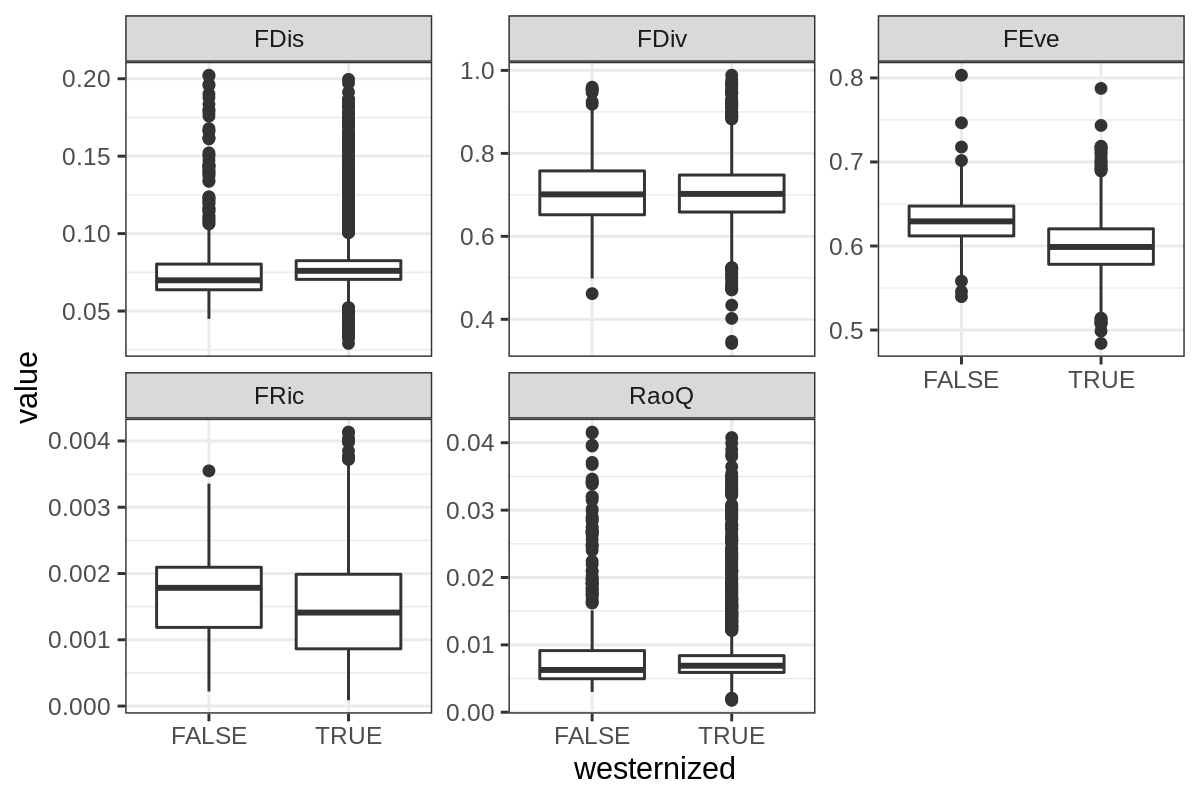

In [20]:
# plotting
p = FD_res_df_f %>%
    ggplot(aes(westernized, value)) +
    geom_boxplot() +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw()
p.dims(6,4)
plot(p)

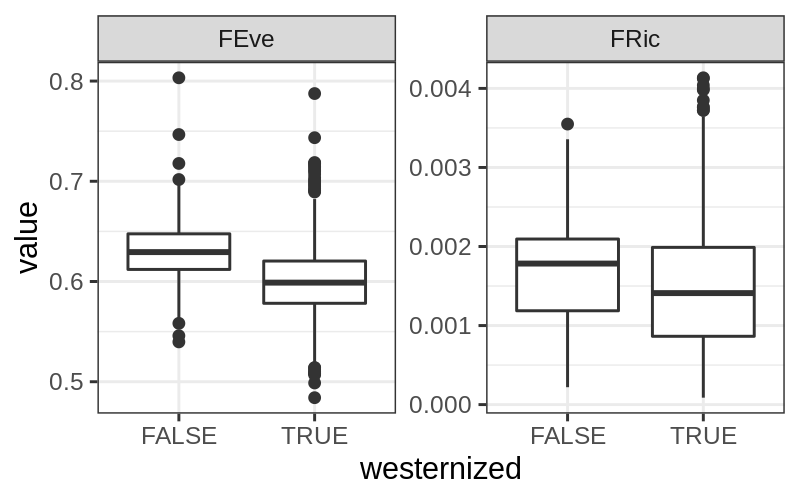

In [21]:
# plotting
p = FD_res_df_f %>%
    filter(measure %in% c('FEve', 'FRic')) %>%
    ggplot(aes(westernized, value)) +
    geom_boxplot() +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw()
p.dims(4,2.5)
plot(p)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 6007 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 6007 rows containing missing values (geom_point).”


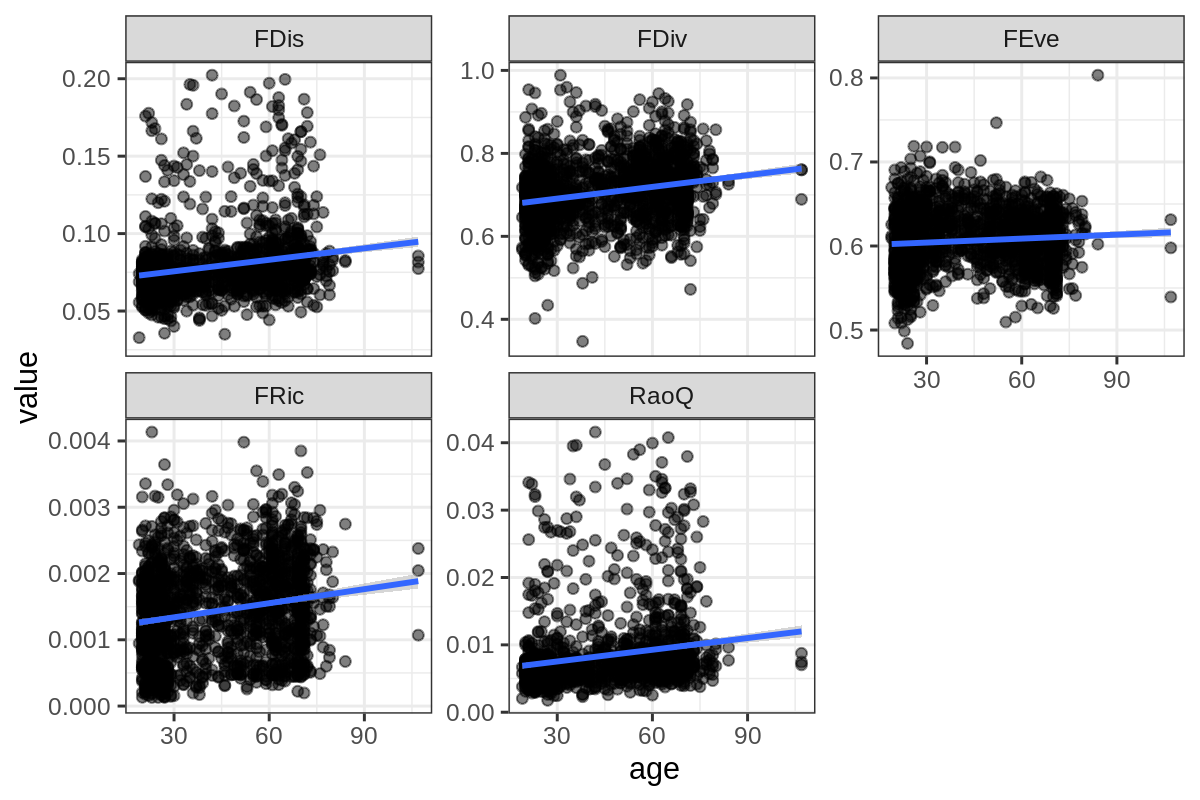

In [22]:
# plotting
p = FD_res_df_f %>%
    ggplot(aes(age, value)) +
    geom_point(alpha=0.5) +
    geom_smooth(method='lm') +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw()
p.dims(6,4)
plot(p)

`geom_smooth()` using formula 'y ~ x'



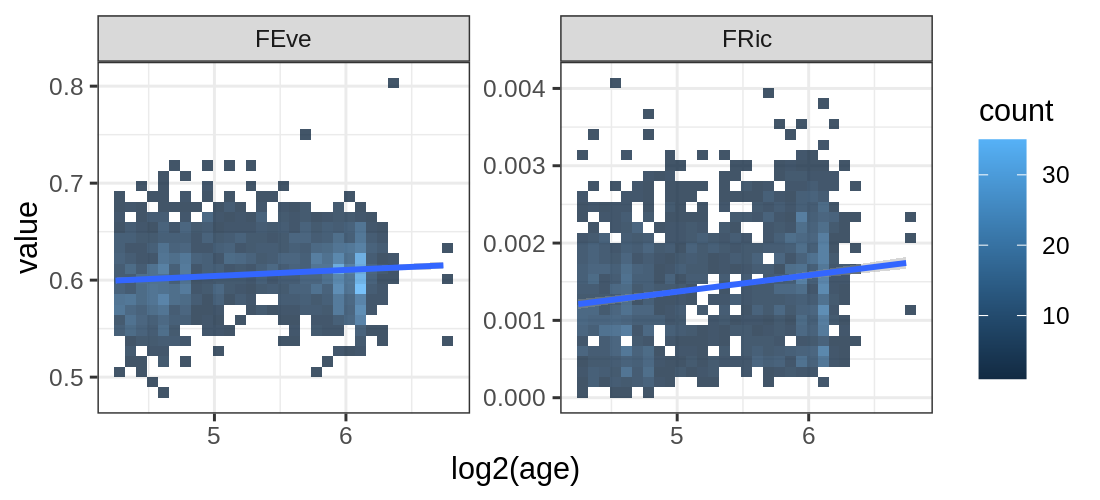

In [23]:
# plotting
p = FD_res_df_f %>%
    filter(!is.na(age)) %>%
    mutate(age = log2(age)) %>%
    filter(measure %in% c('FEve', 'FRic')) %>%
    ggplot(aes(age, value)) +
    geom_bin2d(alpha=0.8) +
    geom_smooth(method='lm') +
    labs(x='log2(age)') +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw()
p.dims(5.5,2.5)
plot(p)

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”


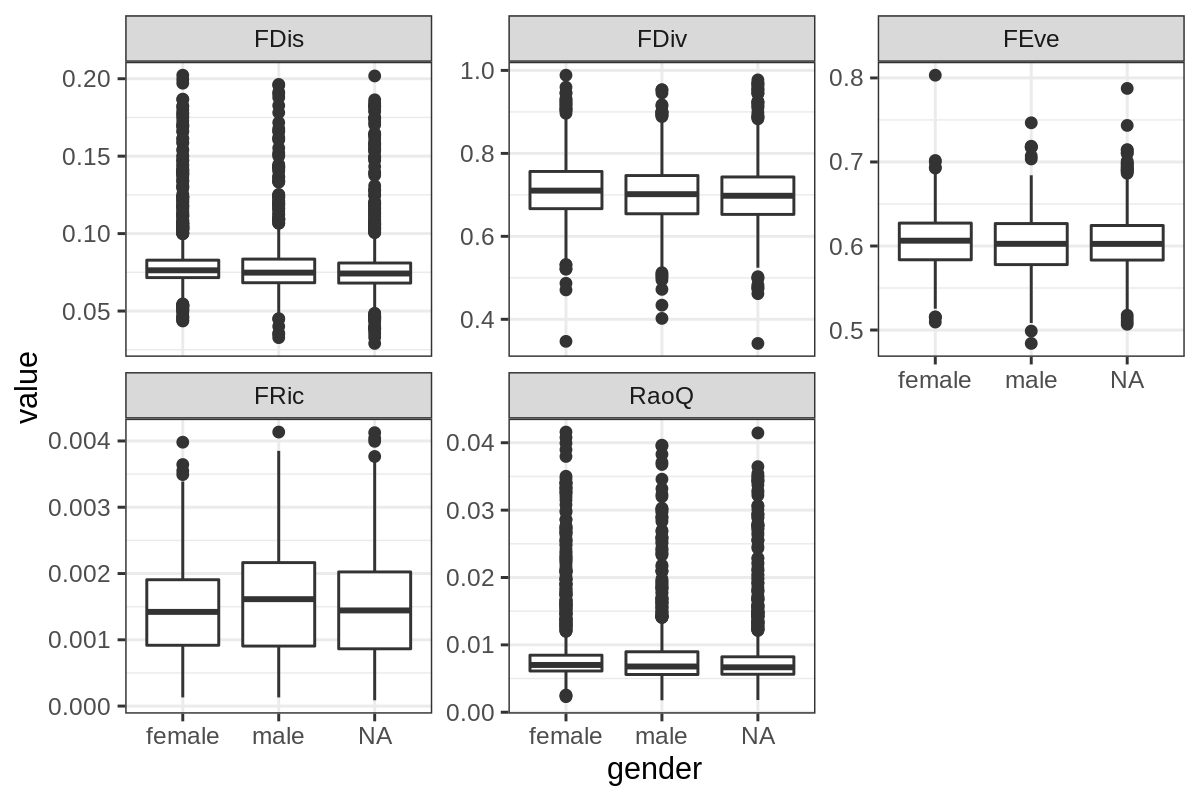

In [24]:
# plotting
p = FD_res_df_f %>%
    ggplot(aes(gender, value)) +
    geom_boxplot() +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw()
p.dims(6,4)
plot(p)

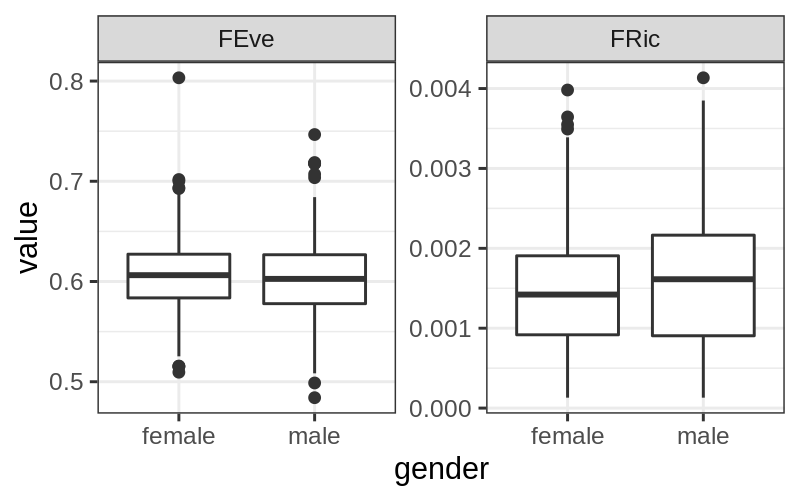

In [25]:
# plotting
p = FD_res_df_f %>%
    filter(!is.na(gender)) %>%
    filter(measure %in% c('FEve', 'FRic')) %>%
    ggplot(aes(gender, value)) +
    geom_boxplot() +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw()
p.dims(4,2.5)
plot(p)

Warning message:
“Removed 9435 rows containing missing values (geom_point).”


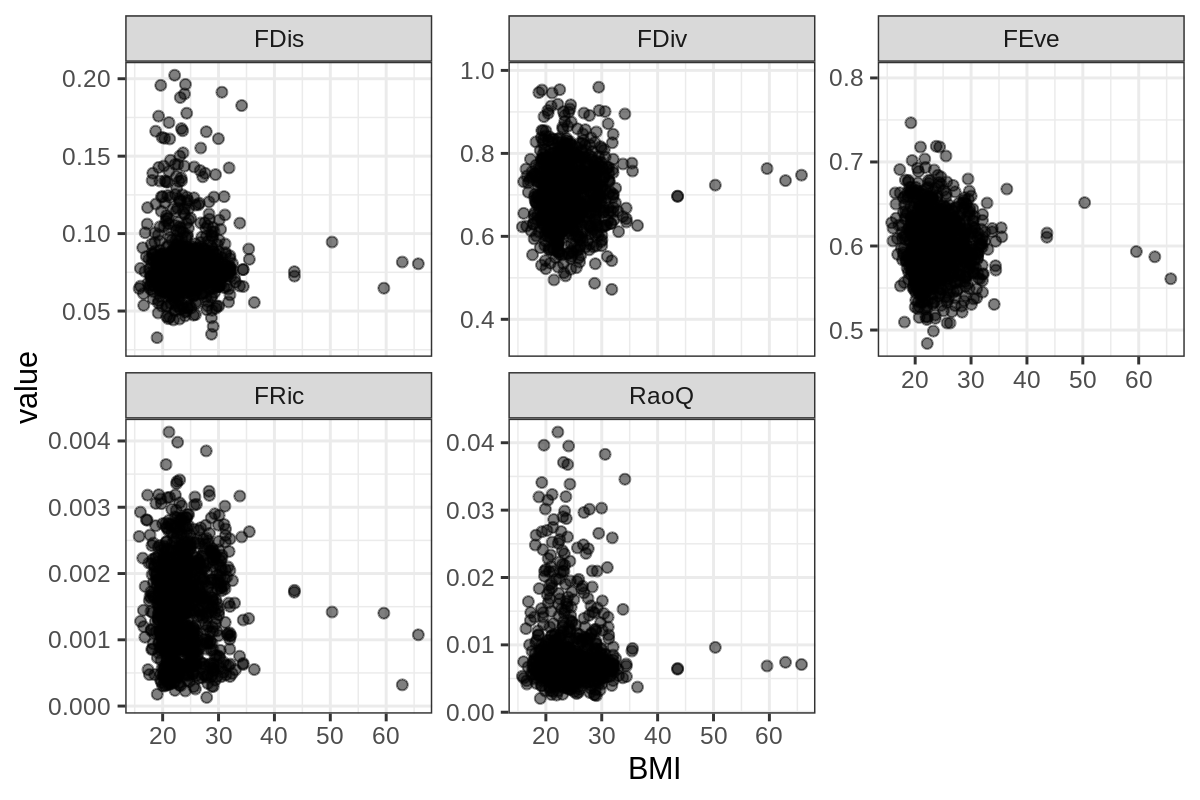

In [26]:
# plotting
p = FD_res_df_f %>%
    ggplot(aes(BMI, value)) +
    geom_point(alpha=0.5) +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw()
p.dims(6,4)
plot(p)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 3774 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 3774 rows containing missing values (geom_point).”


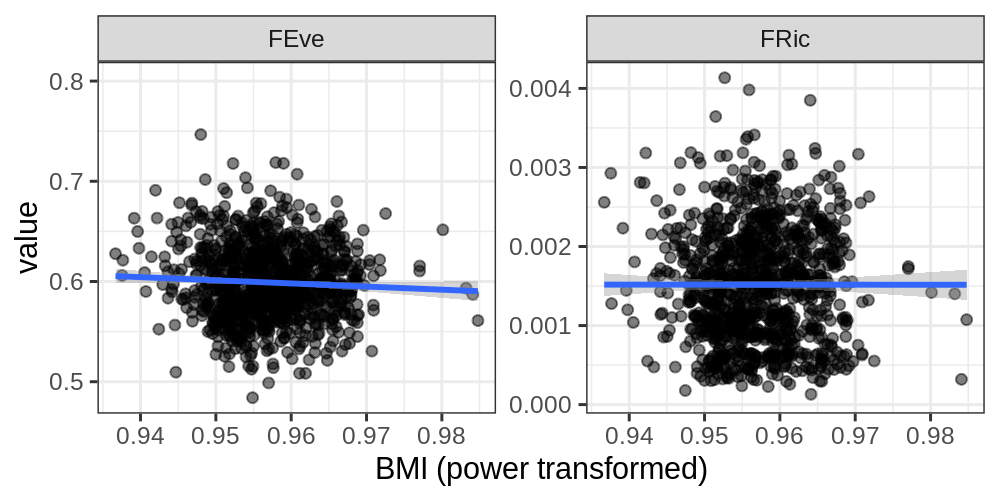

In [27]:
# plotting
p = FD_res_df_f %>%
    filter(measure %in% c('FEve', 'FRic')) %>%
    mutate(BMI = car::bcPower(BMI, -1)) %>%
    ggplot(aes(BMI, value)) +
    geom_point(alpha=0.5) +
    geom_smooth(method='lm') +
    labs(x='BMI (power transformed)') +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw()
p.dims(5,2.5)
plot(p)

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”


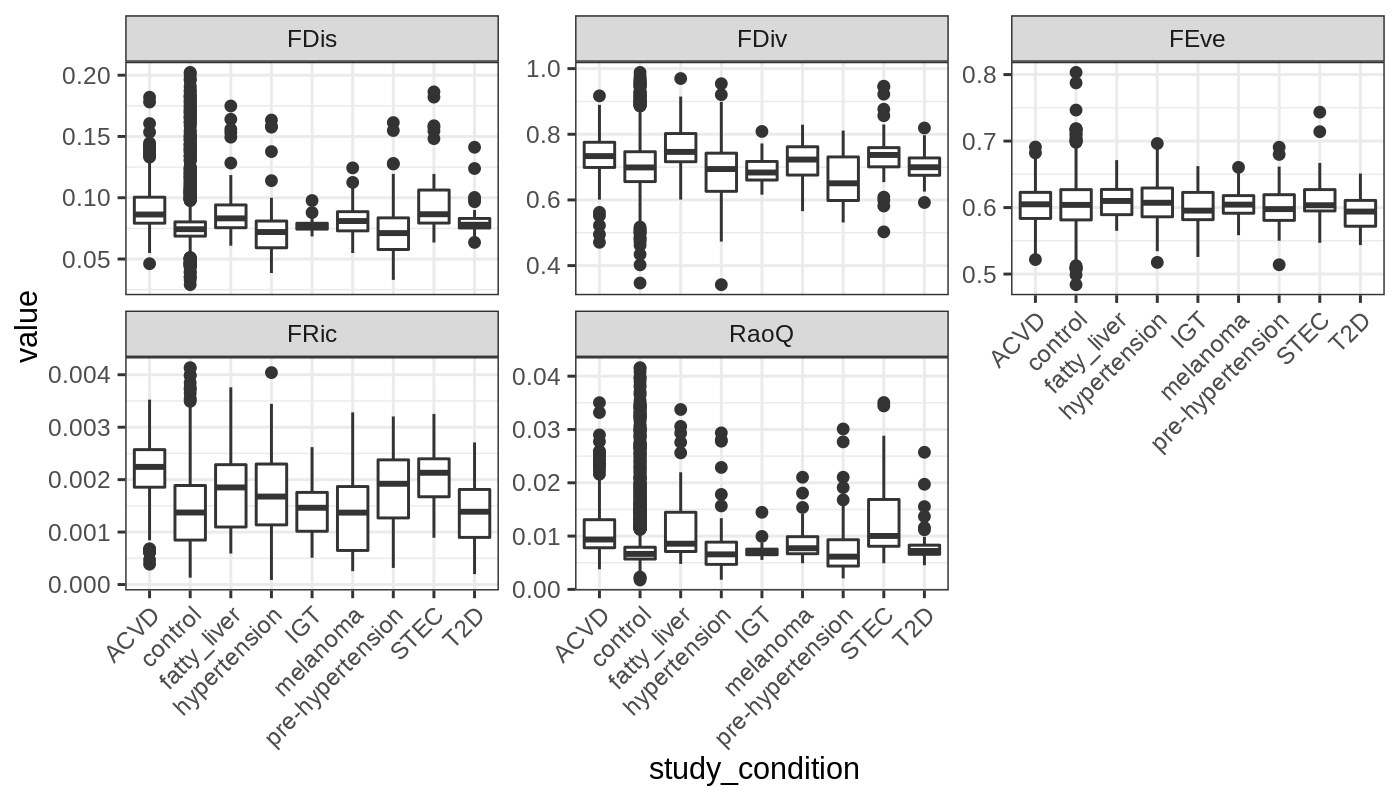

In [28]:
# plotting
p = FD_res_df_f %>%
    ggplot(aes(study_condition, value)) +
    geom_boxplot() +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(7,4)
plot(p)

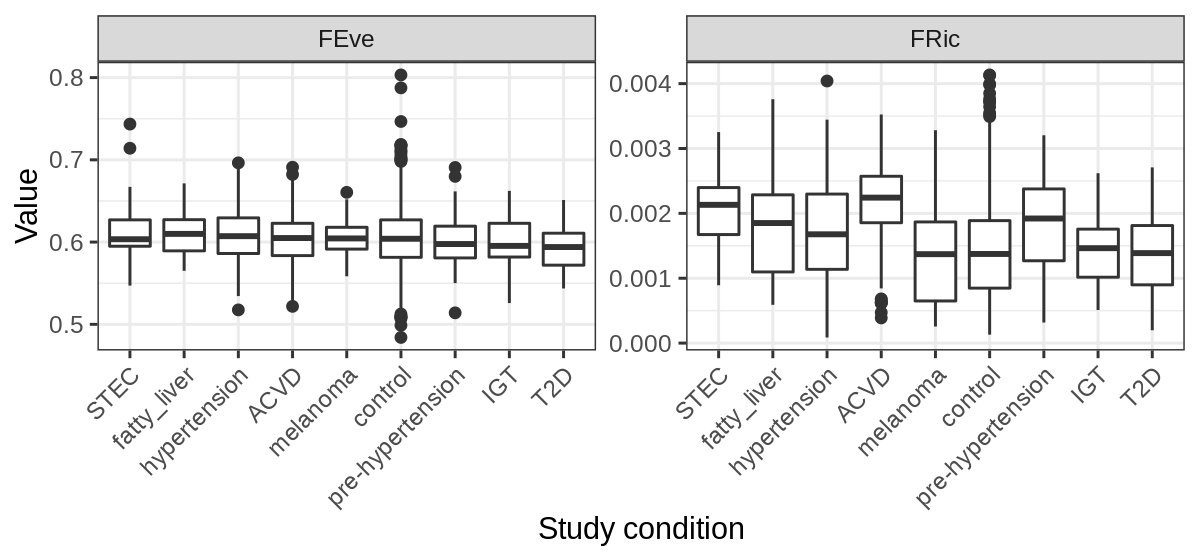

In [29]:
# plotting
func = function(x) mean(-x)
p = FD_res_df_f %>%
    filter(measure %in% c('FEve', 'FRic')) %>%
    mutate(study_condition = study_condition %>% reorder(value, func)) %>%
    ggplot(aes(study_condition, value)) +
    geom_boxplot() +
    labs(x='Study condition', y='Value') +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(6,2.8)
plot(p)

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”


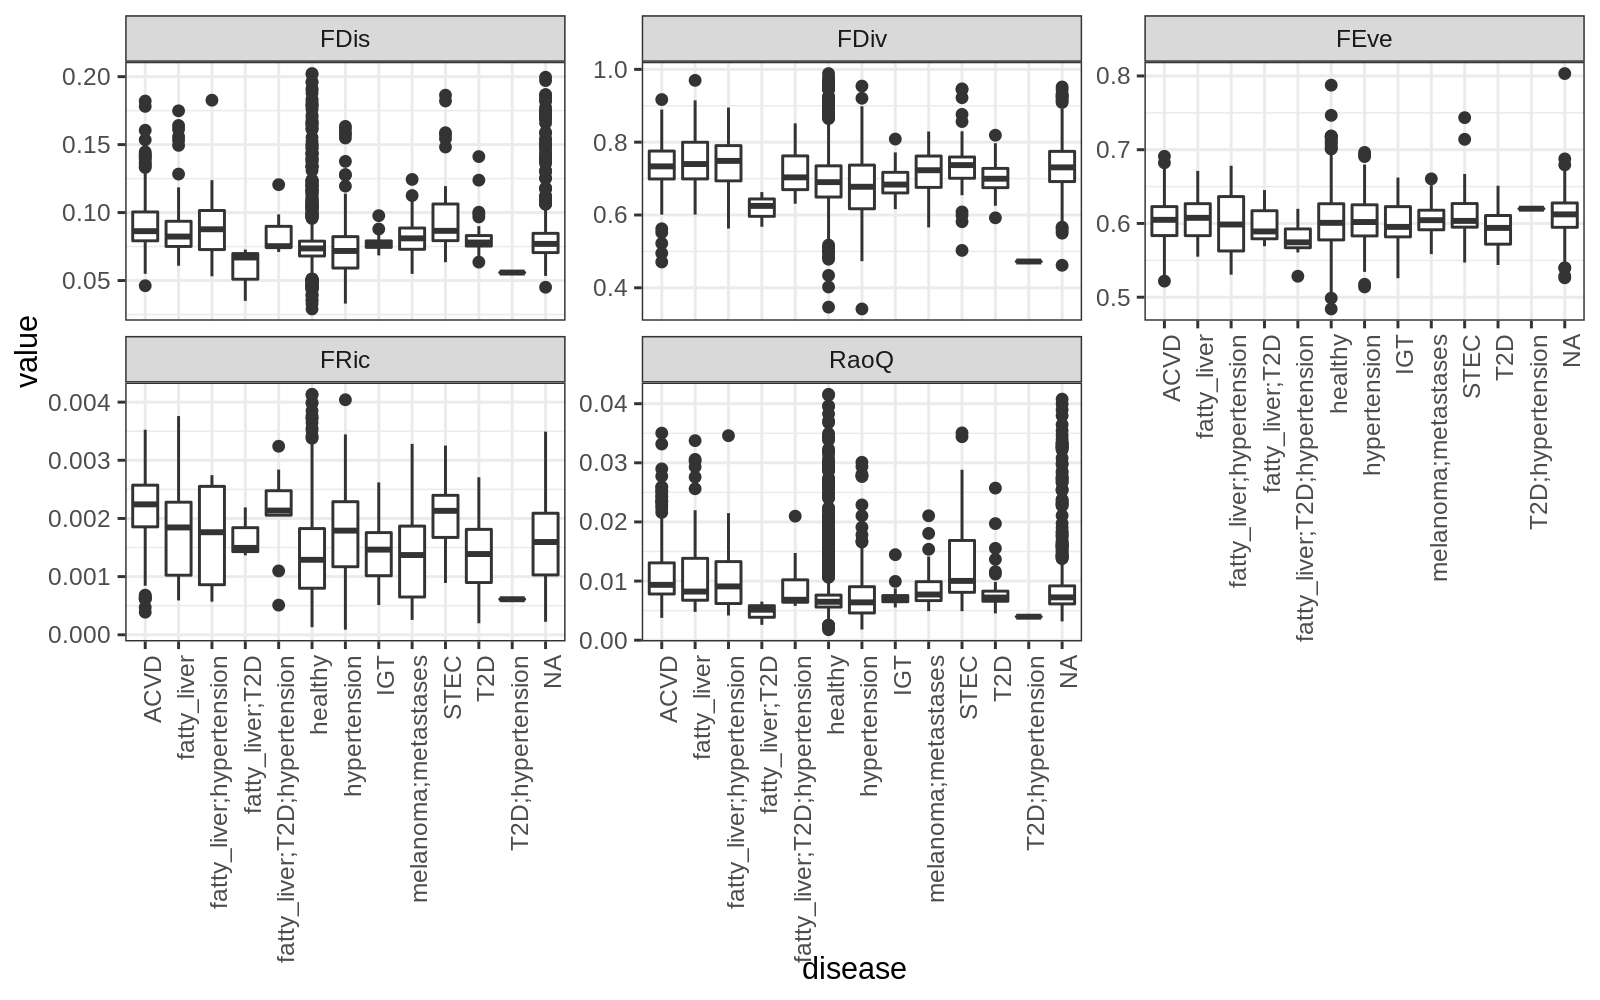

In [30]:
# plotting
p = FD_res_df_f %>%
    ggplot(aes(disease, value)) +
    geom_boxplot() +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.9)
    )
p.dims(8,5)
plot(p)

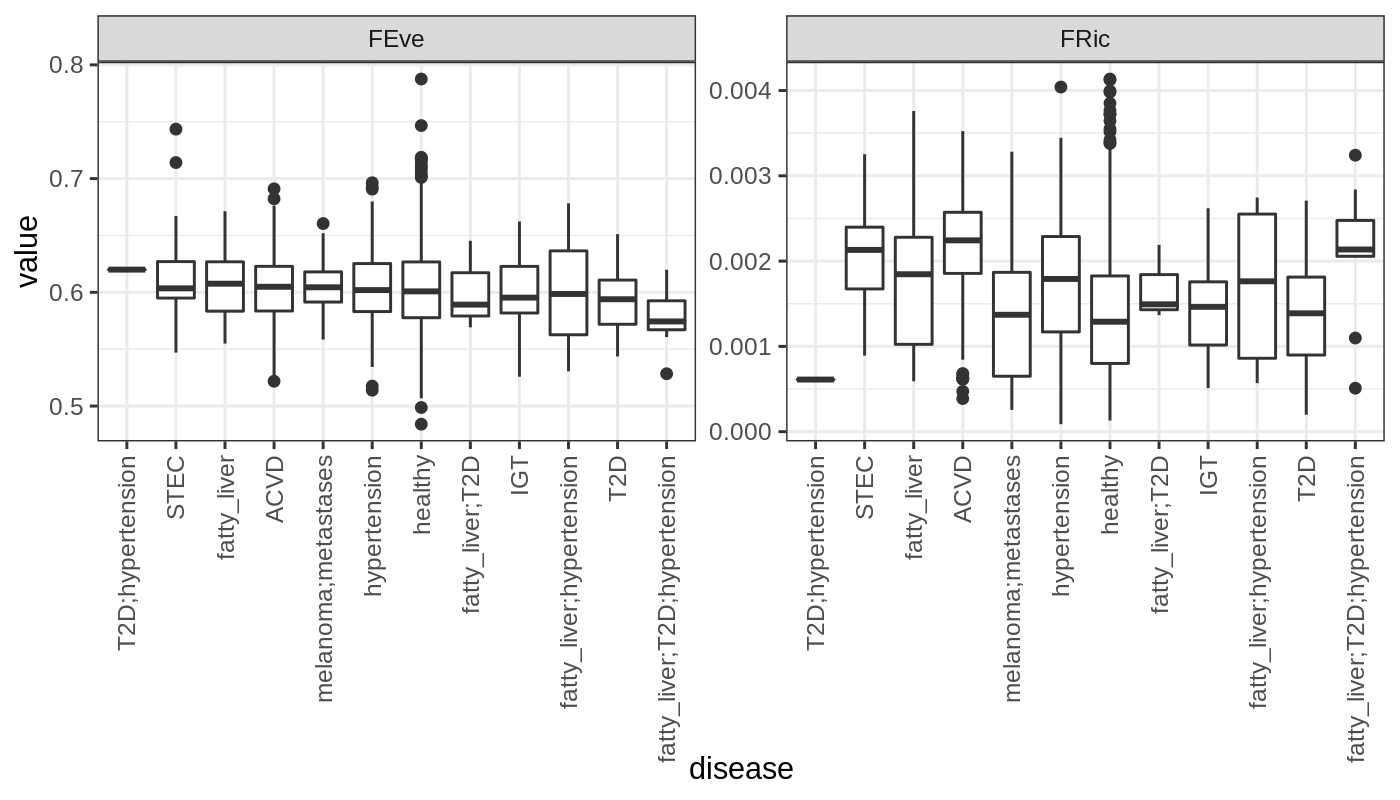

In [31]:
# plotting
func = function(x) mean(-x)
p = FD_res_df_f %>%
    filter(measure %in% c('FEve', 'FRic')) %>%
    filter(!is.na(disease)) %>%
    mutate(disease = disease %>% reorder(value, func)) %>%
    ggplot(aes(disease, value)) +
    geom_boxplot() +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )
p.dims(7,4)
plot(p)

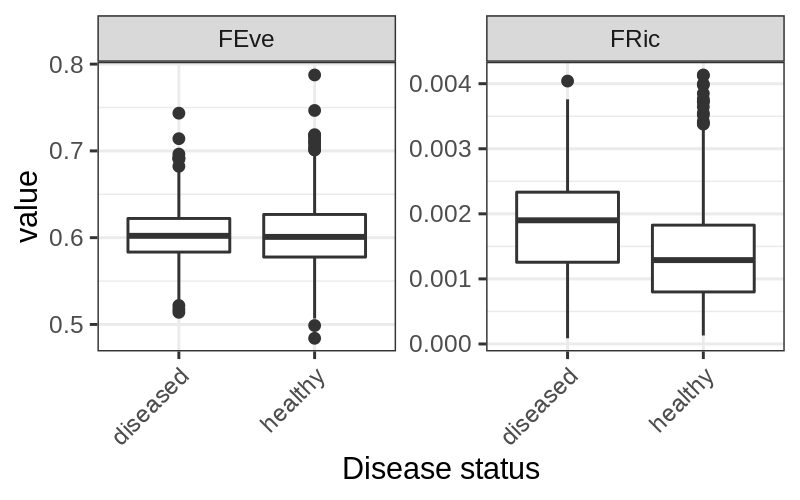

In [32]:
# plotting
func = function(x) mean(-x)
p = FD_res_df_f %>%
    filter(measure %in% c('FEve', 'FRic')) %>%
    filter(!is.na(disease)) %>%
    mutate(disease = ifelse(disease != 'healthy', 'diseased', disease)) %>%
    mutate(disease = disease %>% reorder(value, func)) %>%
    ggplot(aes(disease, value)) +
    geom_boxplot() +
    labs(x='Disease status') +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(4,2.5)
plot(p)

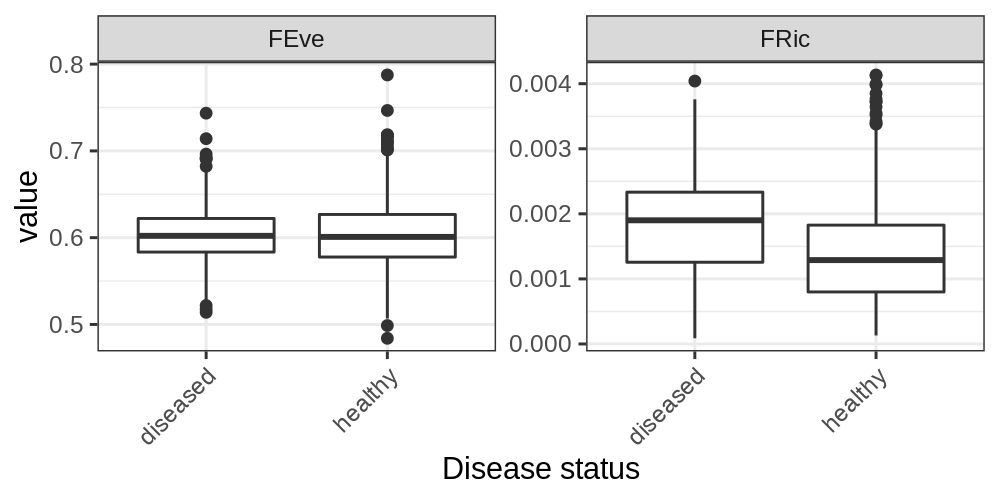

In [33]:
# plotting
func = function(x) mean(-x)
p = FD_res_df_f %>%
    filter(measure %in% c('FEve', 'FRic')) %>%
    filter(!is.na(disease)) %>%
    mutate(disease = ifelse(disease != 'healthy', 'diseased', disease)) %>%
    mutate(disease = disease %>% reorder(value, func)) %>%
    ggplot(aes(disease, value)) +
    geom_boxplot() +
    labs(x='Disease status') +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(5,2.5)
plot(p)

In [34]:
# calculating effect size
cohen_d = function(df){
    res = effsize::cohen.d(scales::rescale(df$value), 
                           df$disease)
    res = data.frame(estimate = res$estimate,
                     ci_lower = res$conf.int[1],
                     ci_upper = res$conf.int[2],
                     measure = df$measure[1],
                     n = nrow(df))
    return(res)
}

cd_res = FD_res_df_f %>%
    filter(measure %in% c('FEve', 'FRic')) %>%
    filter(!is.na(disease)) %>%
    mutate(disease = ifelse(disease != 'healthy', 'diseased', disease),
           disease = disease %>% factor(levels=c('healthy', 'diseased'))) %>%
    group_split(measure) %>%
    lapply(cohen_d) %>%
    rbindlist(use.names=TRUE) 
cd_res

estimate,ci_lower,ci_upper,measure,n
<dbl>,<dbl>,<dbl>,<chr>,<int>
-0.02169599,-0.1118676,0.06847558,FEve,2418
-0.63360307,-0.7255256,-0.54168055,FRic,2418


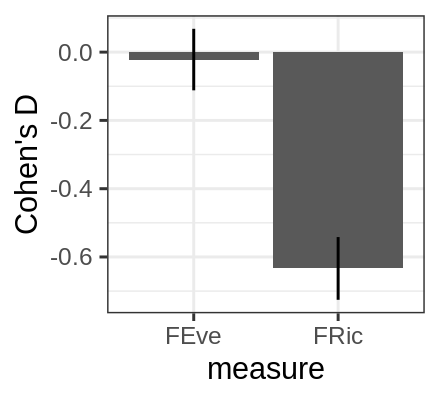

In [35]:
# plotting
p = cd_res %>%
    ggplot(aes(measure, estimate)) +
    geom_bar(stat='identity') +
    geom_linerange(aes(ymin=ci_lower,
                       ymax=ci_upper)) +
    labs(y='Cohen\'s D') +
    theme_bw()
p.dims(2.2,2)
plot(p)

### Mixed effects models

* How does function vary with host phenotype (random effect = study)?

In [36]:
library(lme4)
library(lmerTest)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




In [37]:
lmer_res = list()

#### Full dataset

In [38]:
fm = FD_res_df_f %>%
    filter(measure == 'FRic') %>%
    lmer(value ~ westernized + (1 | dataset_name), data=.) 

summary(fm)
lmer_res[['full_FRic']] = anova(fm, type='II')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ westernized + (1 | dataset_name)
   Data: .

REML criterion at convergence: -34806.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5819 -0.7275 -0.0375  0.6832  4.4112 

Random effects:
 Groups       Name        Variance  Std.Dev. 
 dataset_name (Intercept) 1.685e-07 0.0004105
 Residual                 4.093e-07 0.0006398
Number of obs: 2943, groups:  dataset_name, 30

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)      1.583e-03  1.043e-04  6.529e+01  15.170   <2e-16 ***
westernizedTRUE -9.030e-05  9.482e-05  3.859e+02  -0.952    0.342    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
wstrnzdTRUE -0.675

In [39]:
fm = FD_res_df_f %>%
    filter(measure == 'FEve') %>%
    lmer(value ~ westernized + (1 | dataset_name), data=.) 

summary(fm)
lmer_res[['full_FEve']] = anova(fm, type='II')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ westernized + (1 | dataset_name)
   Data: .

REML criterion at convergence: -12586.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3286 -0.6503 -0.0229  0.5973  6.6174 

Random effects:
 Groups       Name        Variance  Std.Dev.
 dataset_name (Intercept) 0.0002445 0.01564 
 Residual                 0.0007841 0.02800 
Number of obs: 2943, groups:  dataset_name, 30

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       0.620951   0.004191  62.566542 148.154  < 2e-16 ***
westernizedTRUE  -0.010559   0.003996 258.107734  -2.642  0.00874 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
wstrnzdTRUE -0.709

#### Westernized + gender

In [40]:
fm = FD_res_df_f %>%
    filter(!is.na(gender),
           measure == 'FRic') %>%
    lmer(value ~ westernized + gender + (1 | dataset_name), data=.) 

summary(fm)
lmer_res[['w-g_FRic']] = anova(fm, type='II')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ westernized + gender + (1 | dataset_name)
   Data: .

REML criterion at convergence: -21707.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7527 -0.7095 -0.0198  0.6788  4.6171 

Random effects:
 Groups       Name        Variance  Std.Dev. 
 dataset_name (Intercept) 1.386e-07 0.0003723
 Residual                 3.781e-07 0.0006149
Number of obs: 1825, groups:  dataset_name, 16

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)      1.649e-03  1.590e-04  2.692e+01  10.365 6.75e-11 ***
westernizedTRUE -2.906e-04  1.725e-04  4.035e+01  -1.685   0.0998 .  
gendermale       3.730e-05  3.316e-05  1.821e+03   1.125   0.2607    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) wsTRUE
wstrnzdTRUE -0.795       
gendermale  -0.064 -0.033

In [41]:
fm = FD_res_df_f %>%
    filter(!is.na(gender),
           measure == 'FEve') %>%
    lmer(value ~ westernized + gender + (1 | dataset_name), data=.) 

summary(fm)
lmer_res[['w-g_FEve']] = anova(fm, type='II')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ westernized + gender + (1 | dataset_name)
   Data: .

REML criterion at convergence: -7870.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4343 -0.6581 -0.0059  0.6159  6.7098 

Random effects:
 Groups       Name        Variance  Std.Dev.
 dataset_name (Intercept) 0.0002105 0.01451 
 Residual                 0.0007528 0.02744 
Number of obs: 1825, groups:  dataset_name, 16

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)      6.302e-01  6.450e-03  2.558e+01  97.702  < 2e-16 ***
westernizedTRUE -2.563e-02  7.104e-03  3.415e+01  -3.608 0.000977 ***
gendermale      -1.407e-03  1.478e-03  1.822e+03  -0.952 0.341310    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) wsTRUE
wstrnzdTRUE -0.809       
gendermale  -0.075 -0.030

#### westernized + gender + age

In [42]:
fm = FD_res_df_f %>%
    filter(!is.na(gender),
           !is.na(age),
           measure == 'FRic') %>%
    mutate(age = log2(age)) %>%
    lmer(value ~ westernized + gender + age + (1 | dataset_name), data=.) 

summary(fm)
lmer_res[['w-g-a_FRic']] = anova(fm, type='II')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ westernized + gender + age + (1 | dataset_name)
   Data: .

REML criterion at convergence: -19666.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7172 -0.7055 -0.0455  0.6871  4.6024 

Random effects:
 Groups       Name        Variance  Std.Dev. 
 dataset_name (Intercept) 1.324e-07 0.0003639
 Residual                 3.797e-07 0.0006162
Number of obs: 1656, groups:  dataset_name, 16

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)      1.667e-03  2.619e-04  1.497e+02   6.366 2.25e-09 ***
westernizedTRUE -2.911e-04  1.708e-04  3.813e+01  -1.705   0.0964 .  
gendermale       2.630e-05  3.530e-05  1.652e+03   0.745   0.4564    
age             -2.165e-06  3.948e-05  1.429e+03  -0.055   0.9563    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) wsTRUE gnd

In [43]:
fm = FD_res_df_f %>%
    filter(!is.na(gender),
           !is.na(age),
           measure == 'FEve') %>%
    mutate(age = log2(age)) %>%
    lmer(value ~ westernized + gender + age + (1 | dataset_name), data=.) 

summary(fm)
lmer_res[['w-g-a_FEve']] = anova(fm, type='II')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ westernized + gender + age + (1 | dataset_name)
   Data: .

REML criterion at convergence: -7159.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4354 -0.6439 -0.0110  0.6071  6.5523 

Random effects:
 Groups       Name        Variance  Std.Dev.
 dataset_name (Intercept) 0.0002374 0.01541 
 Residual                 0.0007371 0.02715 
Number of obs: 1656, groups:  dataset_name, 16

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)      6.022e-01  1.141e-02  1.566e+02  52.787  < 2e-16 ***
westernizedTRUE -2.571e-02  7.352e-03  3.702e+01  -3.498  0.00124 ** 
gendermale      -2.131e-03  1.555e-03  1.652e+03  -1.371  0.17063    
age              5.356e-03  1.736e-03  1.399e+03   3.084  0.00208 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) wsTRUE gndrml


#### westernized + gender + age + bmi

In [44]:
fm = FD_res_df_f %>%
    filter(!is.na(gender),
           !is.na(age),
           !is.na(BMI),
           measure == 'FRic') %>%
    mutate(age = log2(age),
           BMI = car::bcPower(BMI, -1)) %>%
    lmer(value ~ westernized + gender + age + BMI + (1 | dataset_name), data=.) 

summary(fm)
lmer_res[['w-g-a-b_FRic']] = anova(fm, type='II')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ westernized + gender + age + BMI + (1 | dataset_name)
   Data: .

REML criterion at convergence: -10588.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7490 -0.6705 -0.0632  0.7071  4.6696 

Random effects:
 Groups       Name        Variance  Std.Dev. 
 dataset_name (Intercept) 9.248e-08 0.0003041
 Residual                 3.767e-07 0.0006137
Number of obs: 894, groups:  dataset_name, 10

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)
(Intercept)      2.514e-03  3.472e-03  8.847e+02   0.724    0.469
westernizedTRUE -1.193e-04  1.980e-04  2.466e+01  -0.602    0.553
gendermale       3.655e-05  4.197e-05  8.857e+02   0.871    0.384
age             -3.149e-05  4.757e-05  7.873e+02  -0.662    0.508
BMI             -8.061e-04  3.654e-03  8.889e+02  -0.221    0.825

Correlation of Fixed Effects:
            (Intr) wsTRUE gndrml age   
wstrn

In [45]:
fm = FD_res_df_f %>%
    filter(!is.na(gender),
           !is.na(age),
           !is.na(BMI),
           measure == 'FEve') %>%
    mutate(age = log2(age),
           BMI = car::bcPower(BMI, -1)) %>%
    lmer(value ~ westernized + gender + age + BMI + (1 | dataset_name), data=.) 

summary(fm)
lmer_res[['w-g-a-b_FEve']] = anova(fm, type='II')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ westernized + gender + age + BMI + (1 | dataset_name)
   Data: .

REML criterion at convergence: -3779.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4533 -0.6298  0.0001  0.6165  3.5968 

Random effects:
 Groups       Name        Variance  Std.Dev.
 dataset_name (Intercept) 0.0003390 0.01841 
 Residual                 0.0007945 0.02819 
Number of obs: 894, groups:  dataset_name, 10

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       0.728791   0.160024 888.219999   4.554 5.99e-06 ***
westernizedTRUE  -0.024202   0.010399  41.997781  -2.327   0.0248 *  
gendermale       -0.002355   0.001929 884.754332  -1.221   0.2225    
age               0.005600   0.002204 863.405376   2.541   0.0112 *  
BMI              -0.135062   0.168183 888.436103  -0.803   0.4222    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’

#### westernized + gender + age + disease

In [46]:
fm = FD_res_df_f %>%
    filter(disease != '') %>%
    mutate(disease = ifelse(disease != 'healthy', 'diseased', disease)) %>%
    filter(!is.na(gender),
           !is.na(age),
           !is.na(disease),
           measure == 'FRic') %>%
    mutate(age = log2(age),
           BMI = car::bcPower(BMI, -1)) %>%
    lmer(value ~ westernized + gender + age + disease + (1 | dataset_name), data=.) 

summary(fm)
lmer_res[['w-g-a-d_FRic']] = anova(fm, type='II')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ westernized + gender + age + disease + (1 | dataset_name)
   Data: .

REML criterion at convergence: -15407.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7717 -0.6485 -0.0566  0.6836  4.7360 

Random effects:
 Groups       Name        Variance  Std.Dev. 
 dataset_name (Intercept) 1.240e-07 0.0003521
 Residual                 3.587e-07 0.0005989
Number of obs: 1294, groups:  dataset_name, 14

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)      2.094e-03  2.875e-04  1.937e+02   7.282 8.08e-12 ***
westernizedTRUE -2.517e-04  1.781e-04  4.224e+01  -1.414    0.165    
gendermale      -9.705e-06  3.587e-05  1.289e+03  -0.271    0.787    
age             -1.817e-05  4.135e-05  1.138e+03  -0.439    0.660    
diseasehealthy  -4.799e-04  8.142e-05  8.173e+02  -5.895 5.49e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’

In [47]:
fm = FD_res_df_f %>%
    filter(disease != '') %>%
    mutate(disease = ifelse(disease != 'healthy', 'diseased', disease)) %>%
    filter(!is.na(gender),
           !is.na(age),
           !is.na(disease),
           measure == 'FEve') %>%
    mutate(age = log2(age),
           BMI = car::bcPower(BMI, -1)) %>%
    lmer(value ~ westernized + gender + age + disease + (1 | dataset_name), data=.) 

summary(fm)
lmer_res[['w-g-a-d_FEve']] = anova(fm, type='II')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ westernized + gender + age + disease + (1 | dataset_name)
   Data: .

REML criterion at convergence: -5546.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2904 -0.6345  0.0021  0.6029  4.0301 

Random effects:
 Groups       Name        Variance  Std.Dev.
 dataset_name (Intercept) 0.0002918 0.01708 
 Residual                 0.0007533 0.02745 
Number of obs: 1294, groups:  dataset_name, 14

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)      6.155e-01  1.335e-02  1.778e+02  46.096  < 2e-16 ***
westernizedTRUE -2.968e-02  8.397e-03  4.441e+01  -3.535 0.000967 ***
gendermale      -2.167e-03  1.644e-03  1.289e+03  -1.318 0.187821    
age              4.537e-03  1.900e-03  1.161e+03   2.388 0.017083 *  
diseasehealthy  -6.974e-03  3.747e-03  8.636e+02  -1.861 0.063081 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.0

#### Summary: w/ BMI

In [48]:
# to data.frame
lmer_res_f = lmer_res %>%
    lapply(function(x) tibble::rownames_to_column(x, 'variable')) %>%
    data.table::rbindlist(use.names=TRUE, idcol='hypothesis') %>%
    separate(hypothesis, c('dataset', 'metric'), sep='_') %>%
    rename('P' = `Pr(>F)`) %>%
    filter(dataset != 'w-g',
           dataset != 'w-g-a-d') %>%
    mutate(dataset = case_when(dataset == 'full' ~ '~ westernized +\n(1 | dataset)',
                               dataset == 'w-g-a' ~ '~ westernized +\nage + gender + (1 | dataset)',
                               dataset == 'w-g-a-b' ~ '~ westernized +\nage+ gender + BMI + (1 | dataset)')) %>%
    group_by(dataset, variable) %>%
    mutate(q_val = p.adjust(as.Num(P), method='BH'),
           .groups='drop')
lmer_res_f

dataset,metric,variable,Sum Sq,Mean Sq,NumDF,DenDF,F value,P,q_val,.groups
<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
~ westernized + (1 | dataset),FRic,westernized,3.712169e-07,3.712169e-07,1,385.8805,0.9069032,0.341533547,0.34153355,drop
~ westernized + (1 | dataset),FEve,westernized,5.473230e-03,5.473230e-03,1,258.1077,6.9806763,0.008742709,0.01748542,drop
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
~ westernized + age+ gender + BMI + (1 | dataset),FEve,age,0.0051282243,0.0051282243,1,863.4054,6.4550071,0.01123808,0.02247616,drop
~ westernized + age+ gender + BMI + (1 | dataset),FEve,BMI,0.0005123575,0.0005123575,1,888.4361,0.6449155,0.42215121,0.82544583,drop


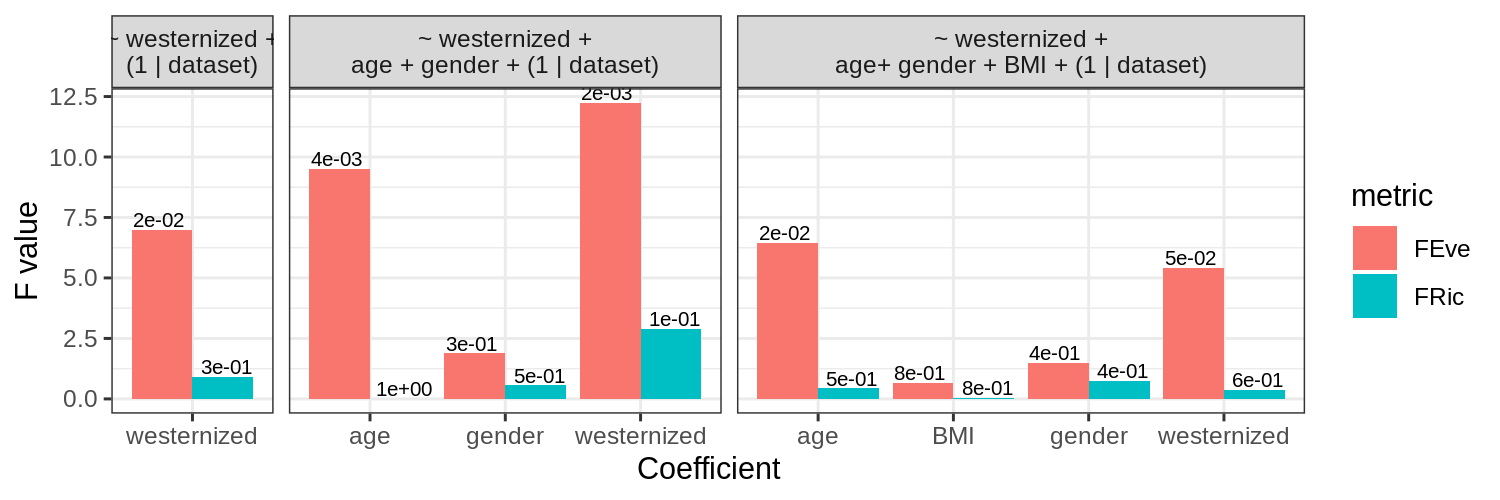

In [49]:
# plotting
p = lmer_res_f %>%
    mutate(q_val = formatC(q_val, format = "e", digits = 0)) %>%
    ggplot(aes(variable, `F value`, fill=metric)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(y = `F value`, label=q_val), vjust=-0.2,
              position = position_dodge(width = 1),
              size=2.6) +
    facet_grid(. ~ dataset, scales='free_x', space='free_x') +
    labs(x='Coefficient') +
    theme_bw() 

p.dims(7.5,2.5)
plot(p)

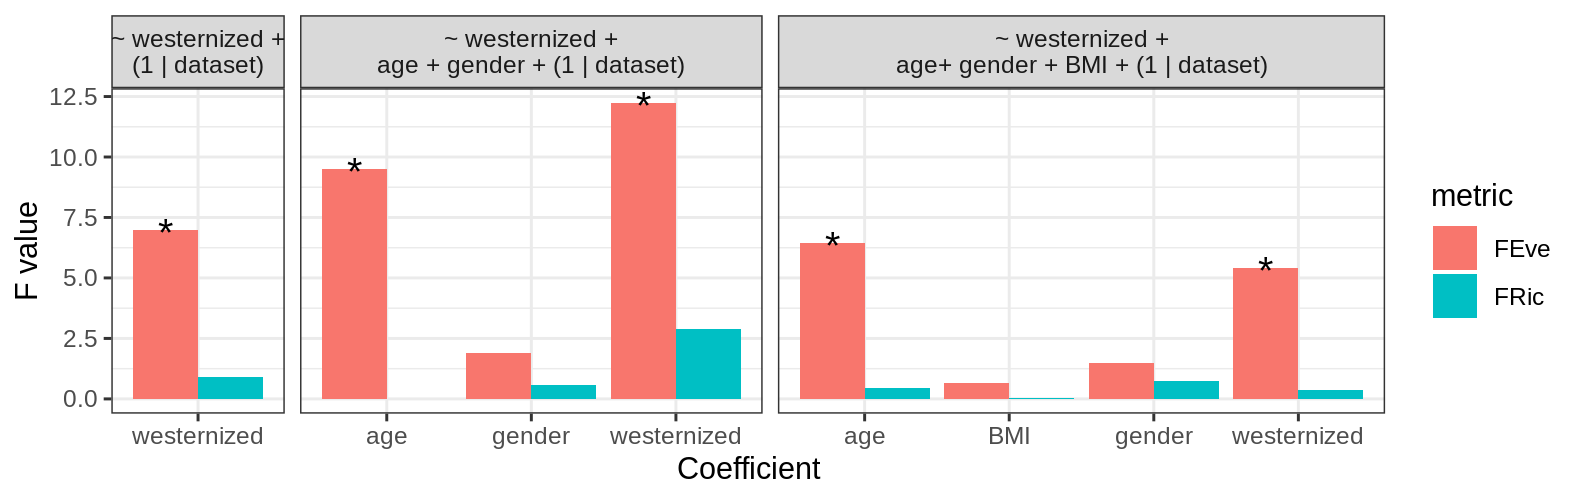

In [50]:
# plotting
p = lmer_res_f %>%
    mutate(sig = ifelse(q_val < 0.05, '*', '')) %>%
    ggplot(aes(variable, `F value`, fill=metric)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(label=sig), size=5, vjust=0.6,
                  position=position_dodge(width=0.9)) +
    facet_grid(. ~ dataset, scales='free_x', space='free_x') +
    labs(x='Coefficient') +
    theme_bw() 

p.dims(7.9,2.5)
plot(p)

#### Summary: w/ Disease

In [51]:
# to data.frame
lmer_res_f = lmer_res %>%
    lapply(function(x) tibble::rownames_to_column(x, 'variable')) %>%
    data.table::rbindlist(use.names=TRUE, idcol='hypothesis') %>%
    separate(hypothesis, c('dataset', 'metric'), sep='_') %>%
    rename('P' = `Pr(>F)`) %>%
    filter(dataset != 'w-g',
           dataset != 'w-g-a-b') %>%
    mutate(dataset = case_when(dataset == 'full' ~ 'measure ~\nwesternized +\n(1 | dataset)',
                               dataset == 'w-g-a' ~ 'measure ~ westernized +\nage + gender + (1 | dataset)',
                               dataset == 'w-g-a-d' ~ 'measure ~ westernized +\nage+ gender + disease + (1 | dataset)')) %>%
    group_by(dataset, variable) %>%
    mutate(q_val = p.adjust(as.Num(P), method='BH'),
           .groups='drop')
lmer_res_f

dataset,metric,variable,Sum Sq,Mean Sq,NumDF,DenDF,F value,P,q_val,.groups
<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
measure ~ westernized + (1 | dataset),FRic,westernized,3.712169e-07,3.712169e-07,1,385.8805,0.9069032,0.341533547,0.34153355,drop
measure ~ westernized + (1 | dataset),FEve,westernized,5.473230e-03,5.473230e-03,1,258.1077,6.9806763,0.008742709,0.01748542,drop
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
measure ~ westernized + age+ gender + disease + (1 | dataset),FEve,age,0.004296783,0.004296783,1,1161.4500,5.704217,0.01708318,0.03416637,drop
measure ~ westernized + age+ gender + disease + (1 | dataset),FEve,disease,0.002608848,0.002608848,1,863.5961,3.463390,0.06308119,0.06308119,drop


File written: /ebio/abt3_projects2/global_metagenome_diversity/ipynb/02_comm_diversity/.figures/d3daaf5c81d4d2418ee34cdb939cb143.RDS 


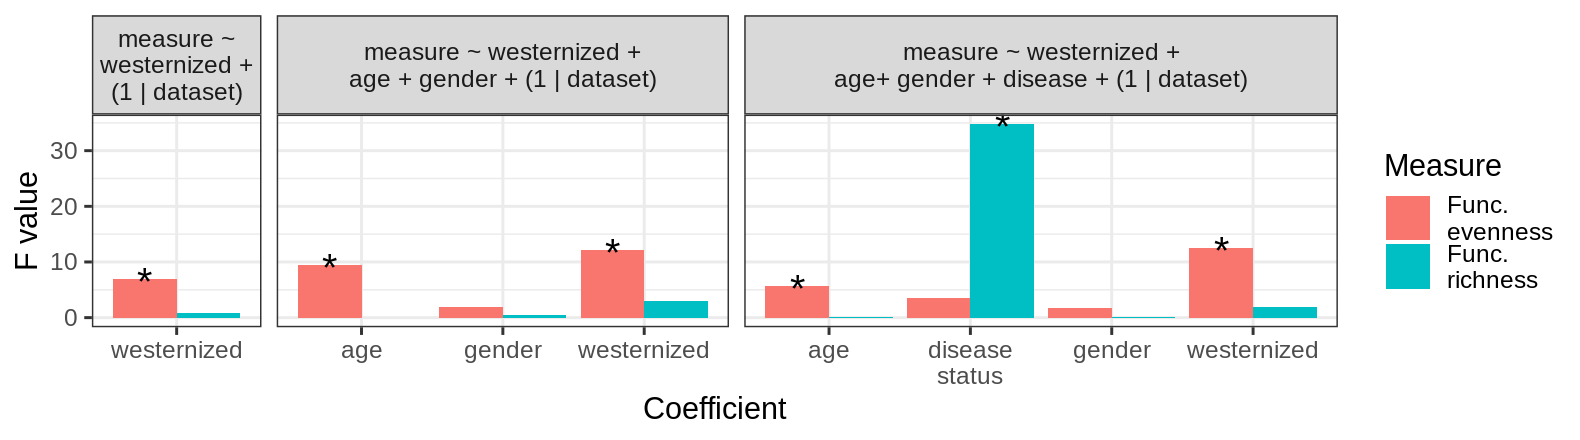

In [54]:
# plotting
p = lmer_res_f %>%
    mutate(metric = ifelse(metric == 'FEve', 'Func.\nevenness', 'Func.\nrichness')) %>%
    mutate(variable = ifelse(variable == 'disease', 'disease\nstatus', variable)) %>%
    mutate(sig = ifelse(q_val < 0.05, '*', '')) %>%
    ggplot(aes(variable, `F value`, fill=metric)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(label=sig), size=5, vjust=0.6,
                  position=position_dodge(width=0.9)) +
    scale_fill_discrete('Measure') +
    facet_grid(. ~ dataset, scales='free_x', space='free_x') +
    labs(x='Coefficient') +
    theme_bw() 
p.dims(7.9,2.2)
Plot(p)

# sessionInfo

In [63]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects2/global_metagenome_diversity/envs/phyloseq/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lmerTest_3.1-3    lme4_1.1-27.1     Matrix_1.3-4      LeyLabRMisc_0.2.0
 [5] FD_1.0-12         vegan_2.5-7       lattice_0.20-45   permute_0.9-5    
 [9] geometry_0.4.5    ade4_1.7-17       ape_5.5           tidytable_0.6.5  
[13] data.table_1.14.0 ggplot2_3.3.5     tidyr